In [55]:
from collections import Counter
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, skew

In [9]:
# option to view entire pandas outputs 
# pd.set_option('display.max_rows', None)

# line of code to cancel the above display setting
# pd.reset_option('all')

### Threshold for number of plays per episode
Checking how many unique episodes and interactions will be filtered away for different thresholds.  

In [ ]:
# loading filtered data
df = pd.read_parquet('../data/podcast_data_filtered.parquet')

# total number of interactions
n_interactions = len(df)

# grouping by prd_number and counting the number of appearances
prd_grp_df = df.groupby('prd_number')['user_id'].count().sort_values(ascending=True)
print(prd_grp_df.head(10))
n_episodes = len(prd_grp_df)
print(f"Number of unique episodes: {n_episodes}")

# testing different thresholds
thresholds = [5, 10, 20, 50]

episode_threshold_data = {"threshold": thresholds,
                          "episode%": [],
                          "interaction%": [],
                          }

# testing the thresholds
for threshold in thresholds:
    # filtering the DataFrame based on the threshold
    filtered_df = df[df['prd_number'].isin(prd_grp_df[prd_grp_df >= threshold].index)]

    # calculating the percentage of episodes and interactions
    episode_percentage = len(filtered_df['prd_number'].unique()) / n_episodes
    interaction_percentage = len(filtered_df) / n_interactions

    # appending the results to the data dictionary
    episode_threshold_data["episode%"].append(episode_percentage)
    episode_threshold_data["interaction%"].append(interaction_percentage)

# generating a dataframe from the gathered data on episodes
episode_threshold_df = pd.DataFrame(episode_threshold_data)
print(episode_threshold_df)

prd_number
19388840413    1
13332195418    1
14202412454    1
14202412456    1
14202410465    1
13332195424    1
13332195425    1
13332195426    1
13332195427    1
14202410481    1
Name: user_id, dtype: int64
Number of unique episodes: 22596
   threshold  episode%  interaction%
0          5  0.648212      0.995035
1         10  0.527438      0.988822
2         20  0.382767      0.973514
3         50  0.210878      0.932505


In [15]:
filtered_df

,user_id,prd_number,date_time,series_title,unique_title,platform,device_type,pub_date,episode_duration,genre,branding_channel,mother_channel,category,content_time_spent
0,000065a7ec329b0fc01a779ead0e8d38d987b070300113...,11032421443,2024-11-01 08:56:00,Brinkmanns briks,Brinkmanns briks: Vi skal tale om pillerne_110...,web,Other,2024-10-30,3422.0,Fakta og debat,DR P1,DR P1,Oplysning og kultur,3423
1,000065a7ec329b0fc01a779ead0e8d38d987b070300113...,11032422442,2024-11-01 11:19:00,Hjernekassen på P1,Hjernekassen på P1: Forebyggelse_11032422442,web,Other,2024-10-29,3363.0,Fakta og debat,DR P1,DR P1,Oplysning og kultur,359
2,000065a7ec329b0fc01a779ead0e8d38d987b070300113...,11162405447,2024-11-01 09:53:00,Ubegribeligt,Ubegribeligt: Vand_11162405447,web,Other,2024-10-31,3417.0,Fakta og debat,DR P1,DR P1,Aktualitet og debat,5160
3,000065a7ec329b0fc01a779ead0e8d38d987b070300113...,11802437044,2024-11-01 08:40:00,Stjerner og striber,"Stjerner og striber: Joken, der ikke vil dø_11...",web,Other,2024-11-01,2847.0,Aktualitet,DR P1,-,Nyheder,2847
4,000065a7ec329b0fc01a779ead0e8d38d987b070300113...,11802451178,2024-11-01 09:27:00,Tiden,"Tiden: Skraldemanden Trump, spansk oversvømmel...",web,Other,2024-11-01,947.0,Nyheder,DR Lyd,-,Nyheder,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984871,ffff0a69d7706029f27aaa2f8d70e9dd619df0584a5422...,11802450454,2024-11-10 20:40:00,Genstart,Genstart: Trumps nye guldalder_11802450454,app,Mobile Phone,2024-11-07,1711.0,Aktualitet,DR Lyd,DR P1,Nyheder,1702
2984872,ffff0a69d7706029f27aaa2f8d70e9dd619df0584a5422...,11802450467,2024-11-29 11:09:00,Genstart,Genstart: Usikker sex_11802450467,app,Mobile Phone,2024-11-17,1478.0,Aktualitet,DR Lyd,-,Nyheder,1476
2984873,ffff0a69d7706029f27aaa2f8d70e9dd619df0584a5422...,11802450474,2024-11-21 08:36:00,Genstart,Genstart: En nuklear kædereaktion_11802450474,app,Mobile Phone,2024-11-21,1327.0,Aktualitet,DR Lyd,DR P1,Nyheder,1328
2984874,ffff0a69d7706029f27aaa2f8d70e9dd619df0584a5422...,11802450482,2024-11-29 11:36:00,Genstart,Genstart: Miss MAGA_11802450482,app,Mobile Phone,2024-11-26,1396.0,Aktualitet,DR Lyd,DR P1,Nyheder,1169


It might be reasonable to filter away episodes with less than 10 plays, as this will keep more than half of the episodes (52.7%) in the training data, while still keeping 98.9% of the interactions. 

### Popularity Bias
Comparison of the distribution of plays per episode in the training data and the distribution of recommendations for each recommender.

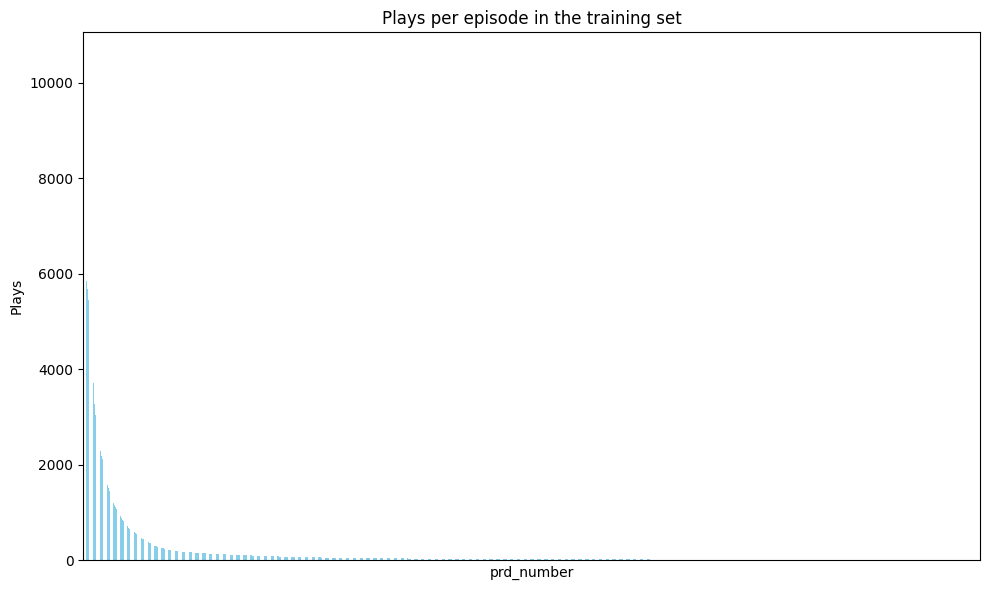

In [24]:
# loading training data
train_df = pd.read_parquet('../data/podcast_data_train.parquet')

# counting occurrences of each prd_number
prd_counts = train_df['prd_number'].value_counts()

# plotting the prd_numbers against their occurrences
plt.figure(figsize=(10, 6))
prd_counts.plot(kind='bar', color='skyblue')

# adding title and labels
plt.title('Plays per episode in the training set')
plt.xlabel('prd_number')
plt.ylabel('Plays')

# removing x-axis ticks
plt.xticks([], []) 

# adjusting layout and show the plot
plt.tight_layout()
plt.show()

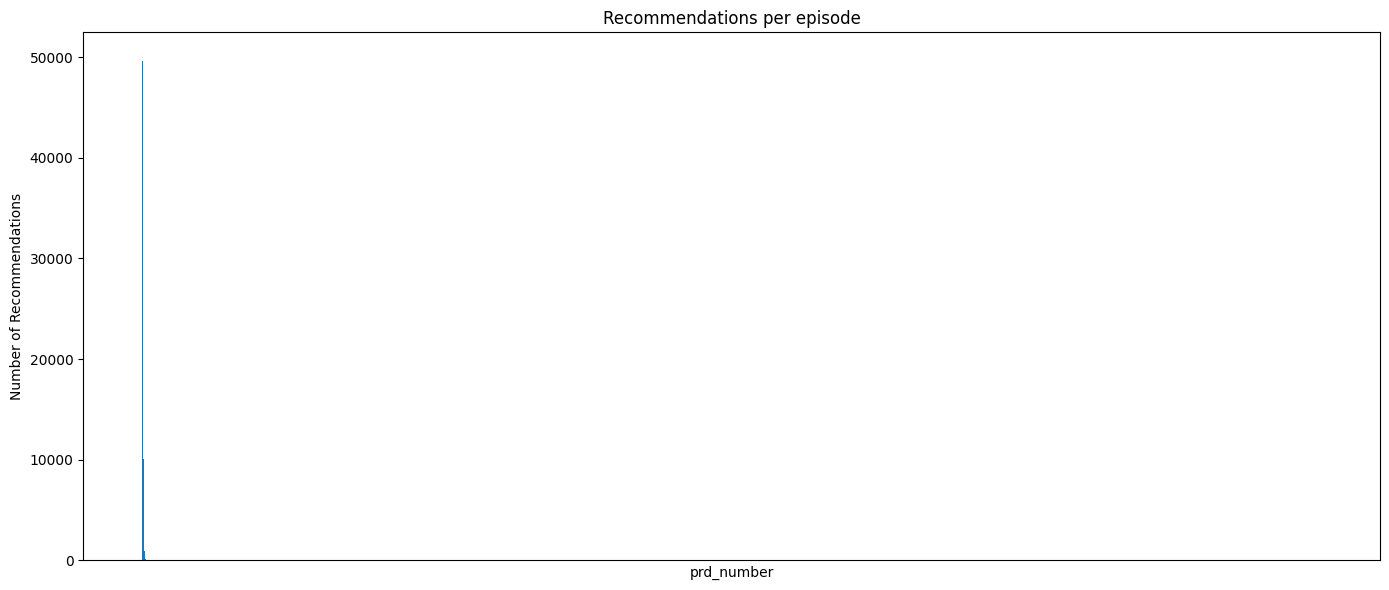

In [26]:
# Specify the path to your JSON file
file_path = "../results/recommendations.json"

# Open and load the JSON file
with open(file_path, "r") as file:
    data = json.load(file)

recommendations = data["cf_recommendations"]

# Flatten all recommended episodes
all_episodes = [episode for rec_list in recommendations.values() for episode in rec_list]

# Count recommended episodes
episode_counts = Counter(all_episodes)

# Get all episodes from train_df
all_prd_numbers = train_df["prd_number"].unique().astype(str)  # make sure they are strings

# Ensure all episodes are in the count dictionary (with 0 if not present)
for ep in all_prd_numbers:
    episode_counts.setdefault(ep, 0)

# Sort by descending count
sorted_episodes = episode_counts.most_common()

# Unpack for plotting
episodes, counts = zip(*sorted_episodes)

# Plotting
plt.figure(figsize=(14, 6))
plt.bar(episodes, counts)

# removing x-axis ticks
plt.xticks([], []) 

# adding labels, title, and adjusting layout
plt.xlabel("prd_number")
plt.ylabel("Number of Recommendations")
plt.title("Recommendations per episode")
plt.tight_layout()
plt.show()


Measuring the skewness of the two distributions:

In [ ]:
# skewness of the distribution of plays in the training set
plays_skewness = skew(prd_counts.values)
print(f"Skewness of the distribution of plays: {plays_skewness}")

# skewness of the distribution of recommendations
recommendation_skewness = skew(counts)
print(f"Skewness of the distribution of recommendations: {recommendation_skewness}")

Skewness of the distribution of plays: 6.9403960176365675
Skewness of the distribution of recommendations: 31.228998360009815


Computing Z-score for significance testing (Z-test):

In [57]:
# using bootstrapping to estimate the standard deviation of the skewness
np.random.seed(250500)

def bootstrap_ses(data, n_bootstrap=1000):
    skew_samples = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        skew_samples.append(skew(sample))
    return np.std(skew_samples)

ses_model = bootstrap_ses(counts)
ses_observed = bootstrap_ses(prd_counts.values)

z = (recommendation_skewness - plays_skewness) / np.sqrt(ses_model**2 + ses_observed**2)
print(f"Z-score: {z}")

# computing the two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"P-value: {p_value}")

Z-score: 4.185202992039988
P-value: 2.849113777680934e-05


### Original EDA (to be refined)

Checking data types of each variable:

In [10]:
transformed_df.dtypes

UserID Visit (evar95)                   object
Production Number (evar35)              object
Serietitel                              object
Unik titel                              object
Platform (evar13)                       object
Mobile Device Type                      object
Content Type (revar3)                   object
Første Streaming Dato                   object
Video Length                             int64
Genre                                   object
Branding Kanal                          object
Moder Kanal                             object
Kategori                                object
Content Time Spent (revent1)             int64
date                            datetime64[ns]
time                                    object
completion_rate                        float64
dtype: object

Summary statistics:

In [11]:
# display floats as they are instead of in scientific notation (e.g. e+04)
pd.options.display.float_format = '{:,.2f}'.format

# counting distinct users, series, and episodes
n_users = transformed_df["UserID Visit (evar95)"].nunique()
n_series = transformed_df["Serietitel"].nunique()
n_episodes = transformed_df["Production Number (evar35)"].nunique()
print(f"Number of uniques: \n- Users:\t{n_users}\n- Series:\t{n_series}\n- Episodes:\t{n_episodes}")

# numerical summaries of video length 
duration_summary = transformed_df["Video Length"].describe()
print("\n")
print("Summary of video length:")
print(duration_summary)
print("\n")

# numerical summary of content time spent 
time_spent_summary = transformed_df["Content Time Spent (revent1)"].describe()
print("Summary of content time spent:")
print(time_spent_summary)
print("\n")

# numerical summary of completion rate
completion_summary = transformed_df["completion_rate"].describe()
print("Summary of completion rate:")
print(completion_summary)
print("\n")

Number of uniques: 
- Users:	144001
- Series:	617
- Episodes:	22589


Summary of video length:
count   3,648,664.00
mean        2,845.20
std         1,970.15
min            21.00
25%         1,560.00
50%         2,277.00
75%         3,421.00
max        28,620.00
Name: Video Length, dtype: float64


Summary of content time spent:
count   3,648,664.00
mean        1,601.92
std         1,561.12
min            61.00
25%           652.00
50%         1,388.00
75%         2,038.00
max       426,294.00
Name: Content Time Spent (revent1), dtype: float64


Summary of completion rate:
count   3,648,664.00
mean            0.63
std             0.36
min             0.00
25%             0.28
50%             0.71
75%             1.00
max             1.00
Name: completion_rate, dtype: float64




Unique listeners per episode:

In [12]:
# Group by "episodeID" and calculate the count of distinct "userID"
unique_listeners = transformed_df.groupby("Production Number (evar35)")["UserID Visit (evar95)"].nunique().reset_index()

# Rename columns for clarity
unique_listeners.columns = ["prd_number", "unique_listeners"]

# Sort by the number of unique listeners in descending order
unique_listeners = unique_listeners.sort_values(by="unique_listeners", ascending=False).reset_index(drop=True)

# Display the result
print(unique_listeners)

        prd_number  unique_listeners
0      11802450402             12758
1      16122492630             11725
2      16122493781             10275
3      16122493791             10084
4      16122492631              9928
...            ...               ...
22584  14302408403                 1
22585  14302408406                 1
22586  14302408407                 1
22587  14302408423                 1
22588  14302408424                 1

[22589 rows x 2 columns]


Unique episodes per user:

In [ ]:
# Group by "user_id" and calculate the count of distinct episodes (by prd_number)
unique_episodes = transformed_df.groupby("user_id")["prd_number"].nunique().reset_index()

# number of users for each value of unique_episodes
episode_counts = unique_episodes["prd_number"].value_counts().sort_index()

print(episode_counts)

                                 user_id  prd_number
0       00005776ec874bc9ab8ca964cf274858          21
1       000113f4d2f242648fb7533e0a7a823c           2
2       000208955b304a77a152a75ce7e9ad3e          95
3       00027173f20a4039b8276592e33d720b           6
4       00028a47584946daac998a27f5a81e46           6
...                                  ...         ...
144042  fffbddd0aabd1a1dbc040d638366fcae           1
144043  fffd070382bb472e9b161a963c0e0613           1
144044  fffd0838ea4c497197f84371b70dcf59          60
144045   fffdacc76db9a561e71b63c0a9c77c9           5
144046  fffdd9e933a748d2b8401bc936751fbe          15

[144047 rows x 2 columns]


prd_number
1       30621
2       17138
3       10677
4        7978
5        5974
        ...  
815         1
928         1
1529        1
2204        1
2386        1
Name: count, Length: 476, dtype: int64


In [ ]:
# set of users who have listened to at least 3 episodes 

Text(0, 0.5, 'frequency')

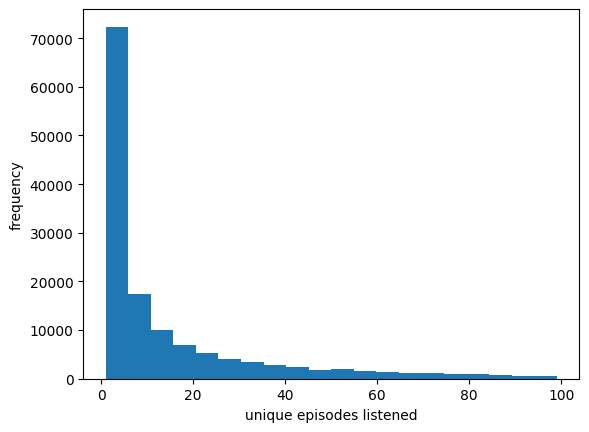

In [14]:
# the distribution of unique episodes per user is skewed
# trying to plot a histogram for users with a lower number of unique episodes listened to
low_unique_episodes = unique_episodes[unique_episodes["unique_episodes"] < 100]
plt.hist(low_unique_episodes["unique_episodes"], bins=20)
plt.xlabel("unique episodes listened")
plt.ylabel("frequency")

In [15]:
transformed_df["UserID Visit (evar95)"].value_counts()

UserID Visit (evar95)
2be981041851708fe138da159ea631a1    2435
63c1dd82fdbb3b3ba8e1c5794bca93b     2344
35114ddc8f304a3ab1504275642697d0    1724
566d0d1425f14e7cb63e206ff23b8892    1114
ae5e3a1bb8a84a43a309d62bf55f4a26    1057
                                    ... 
5a9983b80594497d9dcf9987562d0afa       1
f23580a6b55d4ce4bacc0decc3edc266       1
2c4e5467cdef4332a5ae8a6e5f76199a       1
b3c7417b454544c29b4bf42f8750e287       1
885b596ad45eb98c1b52e417dedcb65        1
Name: count, Length: 144001, dtype: int64

In [16]:
transformed_df["Production Number (evar35)"].value_counts()

Production Number (evar35)
11802450402    15240
16122492630    14936
16122493781    13371
15452448037    13301
16122493791    13025
               ...  
14302416444        1
14102416486        1
14702412443        1
14032412443        1
14032413443        1
Name: count, Length: 22589, dtype: int64

In [17]:
transformed_df["Serietitel"].value_counts()

Serietitel
Genstart                           552655
Djævlen i detaljen                 209854
Tiden                              194290
Sara & Monopolet - podcast         182194
Stjerner og striber                164225
                                    ...  
Festivalsommer                          2
Jydekrogen                              1
Bruce Springsteen - Born to run         1
DR Romanprisen 2017                     1
P8                                      1
Name: count, Length: 617, dtype: int64

In [18]:
transformed_df["Platform (evar13)"].value_counts()

Platform (evar13)
app    3484547
web     134100
Web      30017
Name: count, dtype: int64

In [19]:
transformed_df["Mobile Device Type"].value_counts()

Mobile Device Type
Mobile Phone    3401122
PC               227914
Tablet            19628
Name: count, dtype: int64

In [20]:
counts = transformed_df.groupby(["Platform (evar13)", "Mobile Device Type"]).size().reset_index(name='counts')
counts

,Platform (evar13),Mobile Device Type,counts
0,Web,Mobile Phone,27980
1,Web,Tablet,2037
2,app,Mobile Phone,3373142
3,app,PC,93814
4,app,Tablet,17591
5,web,PC,134100


In [21]:
transformed_df["Genre"].value_counts()

Genre
Fakta og debat     936020
Aktualitet         930306
Nyheder            422473
Livsstil           341318
Unge               308502
Kultur             179096
Musik              157126
Historie           122206
-                  121766
Dokumentar          45942
Sport               37930
Underholdning        4232
NN                   3562
Kor og orkestre        16
Name: count, dtype: int64

"Kanal" og "Branding Kanal" ser ud til at være det samme.

In [22]:
transformed_df["Moder Kanal"].value_counts()

Moder Kanal
-                  1922344
DR P1              1418941
P4 Fælles           128021
DR P2                38577
P3                   26547
DR P6 BEAT           23558
DR P5                23262
DR P8 JAZZ           11947
P1                    3153
P4 Fyn                1486
P4 København          1431
P4 Nordjylland         933
P4 Sjælland            779
P4 Midt & Vest         757
P4 Østjylland          719
P4 Bornholm            603
DR Kultur              510
P4 Syd                 496
DR LYD ekstra 2        409
DR LYD ekstra          306
P4 Trekanten           226
DR Politik             185
DR P2 Plus             185
DR Plus                184
P4 Esbjerg              60
Name: count, dtype: int64

In [23]:
transformed_df["Branding Kanal"].value_counts()

Branding Kanal
DR Lyd            1517168
DR P1             1137327
P3                 334228
P4 Fælles          325840
-                   49546
DR P2               43549
dr.dk radio         41865
DR P6 BEAT          31474
DR P5               22078
DR P8 JAZZ          12102
P4 Fyn               1486
P4 København         1431
P4 Nordjylland        933
P4 Sjælland           779
P4 Midt & Vest        757
P4 Østjylland         719
P4 Bornholm           603
P4 Syd                498
DR LYD ekstra         306
P4 Trekanten          226
P4 Esbjerg             58
Name: count, dtype: int64

In [24]:
transformed_df["Kategori"].value_counts()

Kategori
Oplysning og kultur         1329101
Nyheder                     1028273
Aktualitet og debat          918260
Musik                        251010
Underholdning                 74641
Sport                         38282
Dramatik og fiktion            6499
Udsendelsesvirksomhed          1870
Præsentation og services        728
Name: count, dtype: int64

Histogram of completion rate

Text(0, 0.5, 'density')

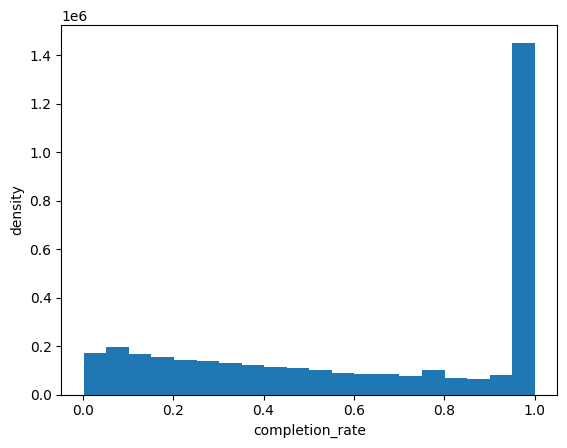

In [25]:
plt.hist(transformed_df["completion_rate"], bins=20)
plt.xlabel("completion_rate")
plt.ylabel("density")

Text(0, 0.5, 'density')

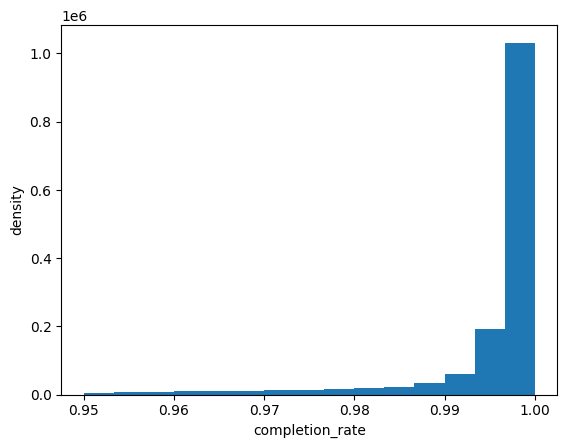

In [26]:
# histogram for completion rates > 0.9
high_rates = transformed_df[transformed_df["completion_rate"] > 0.95]
plt.hist(high_rates["completion_rate"], bins=15)
plt.xlabel("completion_rate")
plt.ylabel("density")